In [236]:
import numpy as np
import re
import matplotlib.pyplot as plt


def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

def create_co_matrix(corpus, vocab_size, window_size=1):
    # store the number of elements in corpus
    corpus_size = len(corpus)
    # initialize the matrix to explain co-occurence matrix of sentence
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    # check co-occurence word of corpus
    for idx, word_id in enumerate(corpus):
        # check left and right side of words from current focus word according to window_size
        for i in range(1, window_size + 1):
            # srote the left and right word index based on the focued word
            left_idx = idx - i
            right_idx = idx + i
            
            if left_idx >= 0: # it has a word in the left side
                # store the word id of the word in the left side
                left_word_id = corpus[left_idx]
                # add one count to the index of the left word's id
                co_matrix[word_id, left_word_id] += 1
            
            if right_idx < corpus_size: # it has a word in the right side
                # same process of the left side version
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
    
    return co_matrix

def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x**2)) + eps)
    ny = y / (np.sqrt(np.sum(y**2)) + eps)
    return np.dot(nx, ny)

def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    query = query.lower()
    # extract query
    if query not in word_to_id:
        print('{} is not found'.format(query))
        return
    
    print('\n[query] {}'.format(query))
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # calculate the cosin-similarity
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
    
    # output the similarity order by high value
    count = 0
    for i in (-1*similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))
        
        count += 1
        if count >= top:
            return
        
def ppmi(C, vervose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)
            
            if vervose:
                cnt += 1
                if cnt % (total/100) == 0:
                    print('%.1f%% done' % (100*cnt/total))
    
    return M
    

In [237]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
C = create_co_matrix(corpus, len(word_to_id))
W = ppmi(C)
U, S, V = np.linalg.svd(W)

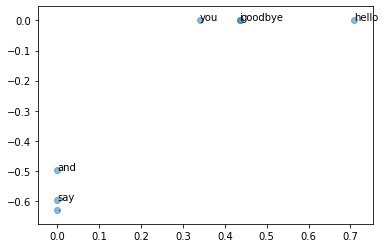

In [238]:
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()

In [1]:
import sys
sys.path.append('..')
from dataset import ptb

In [4]:
corpus, word_to_id, id_to_word = ptb.load_data('train')

In [6]:
print('corpus size: {}'.format(len(corpus)))
print('corpus[:30]: {}'.format(corpus[:30]))
print()

corpus size: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]



In [10]:
print("word_to_id['car']: {}".format(word_to_id['car']))

word_to_id['car']: 3856
